## 군집 분석
- 유사한 데이터를 묶어주는 분석
  - 예) 서로 다른 주제를 지닌 대량의 뉴스기사들이 있다고 가정했을 때 연구자가 유사한 주제들의 문서끼리 묶어서 보고 싶을 경우
  - 예) 유사한 문서들끼리 묶어진 이후에는 해당 군집에 대하여 깊이 있는 분석을 수행하여 특정 주제나 성격을 지닌 문서들을 심층적으로 파고들 수 있음
- 방법
  - 분할 군집 분석
  - 구조적 군집 분석

In [1]:
import os
java_home = os.environ.get('JAVA_HOME', None)
if not java_home:
    java_path = 'C:/Program Files/Java/jdk-14.0.1/bin'
    os.environ['JAVA_HOME'] = java_path
else:
    print(java_home)

### 분할 군집 분석
- 가장 단순하면서도 가장 널리 사용되는 방식
- 데이터를 k개의 배타적인 집단으로 나누는데 이 때 군집 숫자 k개는 배경 지식을 통해 결정된다고 가정
- k를 어떻게 지정할지 고민된다면 이를 해결해줄 수 있는 수학, 통계적인 방법들을 이용
  - 예) silhouette, elbow 방법
  
#### K-평균 군집 분석
- 알고리즘
  - 전체 데이터 세트에서 임의로 k개의 오브젝트를 선택해서 군집의 초기 중앙점으로 삼음
  - 나머지 오브젝트 각각에 대해 거리를 바탕으로 k개의 군집 중에서 가장 가까운 군집을 찾아 그 안에 포함시킨 후, 반복적으로 군집 내부 편차를 향상시킴
  - 모든 군집에 대해 직전 반복까지 포함시킨 오브젝트를 통해 새로운 중심을 계산하고 새로 계산한 군집 중심을 바탕으로 오브젝트 군집을 재배치함
  - 위 과정을 수렴할 때까지 계속 반복함
- 주로 유클리디안 기하 거리를 이용하나 코사인 유사도를 이용한 거리가 효과적임
- 텍스트 마이닝의 경우, 문서의 단어 빈도 혹은 TF-IDF와 같은 가중치가 문서 A, B의 벡터를 들어감
- TF-IDF
  - TF-IDF는 텍스트 마이닝에 이용되는 대표적인 가중치로 여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치
  - TF(term frequency): 특정한 단어가 문서 내에서 얼마나 자주 등장하는지를 나타낸 값
  - DF(document frequency): 해당 단어가 문서군 내에서 얼마나 자주 사용되는지 나타내는 지표로 단어가 흔하게 등장할수록 중요한 단어가 아니라고 볼 수 있음
  - 예) 신문기사 1,000개를 전체 문서군으로 봤을 때 '기자'라는 단어는 1,000개의 문서 모두에 등장하기 때문에 DF 수치가 매우 높을 것임. 또한, '기자'라는 단어 자체는 흔하기 때문에 특징이 되는 주요 단어라고 볼 수 없을 것임. 따라서 DF의 역수인 IDF(inverse document frequency)를 구하고 TF와 IDF의 값을 곱한 TF-IDF 수치를 산출함
- 관련 라이브러리 인스톨
  - pip install sklearn

In [2]:
# K-평균 군집 분석
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [3]:
hannanum = Hannanum()
Data = pd.read_csv('data/군집분석데이터.csv', engine="python")
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [4]:
# 한나눔 형태소 분석기로 명사만 추출
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

In [5]:
# 명사들을 띄어쓰기를 붙여서 열거
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [6]:
# 문서-단어 메트릭스 생성
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [7]:
kmeans = KMeans(n_clusters=3).fit(df)
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [8]:
# PCA 기법으로 차원을 2차원으로 축소한 후 군집 결과를 시각화
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents,
                          columns=['principal component 1', 'principal component 2'])
principalDf.index = Data['검색어']
principalDf

,principal component 1,principal component 2
검색어,,
유한양행,-2.245408,-4.167450
유한양행,-3.613951,-9.898581
유한양행,-2.932636,-7.159356
유한양행,-2.142775,-3.757104
유한양행,-3.397879,-8.904286
라돈,-3.456162,0.931167
라돈,-4.172640,2.527033
라돈,-6.418892,7.240861
라돈,-7.928539,10.011251


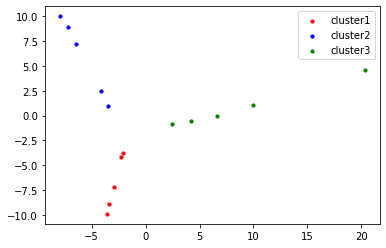

In [9]:
plt.scatter(principalDf.iloc[kmeans.labels_==0, 0], 
            principalDf.iloc[kmeans.labels_==0, 1], 
            s=10, c='red', label='cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_==1, 0], 
            principalDf.iloc[kmeans.labels_==1, 1], 
            s=10, c='blue', label='cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_==2, 0], 
            principalDf.iloc[kmeans.labels_==2, 1], 
            s=10, c='green', label='cluster3')
plt.legend()

#### k-대푯값 군집 분석
- K-평균 군집 분석은 클러스터 안에서 다른 오브젝트에 비해 거리가 먼 오브젝트의 영향력이 크기 때문에 아웃라이어에 매우 민감함 --> 아웃라이어가 존재 시 클러스터 중심을 계산할 때 평균값이 크게 왜곡될 수 있고 한번 잘못 계산한 중심은 다른 오브젝트들을 배정할 때도 반영되어 전체적으로 악영향을 끼침
- K-대푯값 군집 분석은 이상치의 영향을 덜 받게 되지만, 분석 시 반복횟수가 많아지게 되어 시간이 오래 걸린다는 단점이 있음
- pip install pyclustering

In [10]:
# K-대푯값 군집 분석
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids
import numpy as np

In [11]:
hannanum = Hannanum()
Data = pd.read_csv('data/군집분석데이터.csv', engine="python")
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [12]:
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))
    
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
    
vec = CountVectorizer()
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [13]:
# initial_index_medoids의 인자에 초기 대표 오브젝트를 입력해주어야 하는데
# numpy 라이브러리의 randint 함수를 이용해서 0~14중 임의의 정수를 3개를 뽑음
# 완벽하게 잘 분류하지 못함
kmedoids_instance = kmedoids.kmedoids(df.values, 
                                      initial_index_medoids=np.random.randint(15, size=3))
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
clusters

[[8, 7, 9], [3, 0, 2, 5, 6, 10, 11, 12, 13, 14], [4, 1]]

### 구조적 군집 분석
- 데이터 오브젝트를 트리 형태의 군집으로 나눔
- 계층적 군집 분석 덴드로그램

#### 거리 측정법
- 최소거리와 최대거리
  - 최소거리는 두 군집에서 가장 가까운 오브젝트들을 연결하면서 전체적인 계층을 형성함
  - 최대거리는 두 군집에서 가장 먼 오브젝트들을 연결하면서 전체적인 계층을 형성함
  - 최소거리와 최대거리는 아웃라이어나 노이즈에 상대적으로 민감함
- 평균거리
  - 두 군집의 중심점(평균점) 간의 거리로 계층을 생성해가며 계산과정이 비교적 간단하다는 장점이 있음
- 거리평균
  - 군집 간 각 오브젝트 간의 거리를 모두 합한 후 오브젝트 조합 개수로 나누어 거리를 계산함
  - 벡터를 계산하기 어려운 정성적인 데이터들에게도 적용 가능하다는 장점이 있음
- Ward 측정법
  - 군집 내 증분과 군집 간 제곱합을 동시에 고려하여 거리를 산출함
  - 아웃라이어나 노이즈에 덜 민감하며 비슷한 크기의 군집끼리 묶어주는 경향이 있음

In [14]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

hannanum = Hannanum()
Data = pd.read_csv('data/군집분석데이터.csv', engine="python")
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [15]:
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))
    
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

vec = CountVectorizer()
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

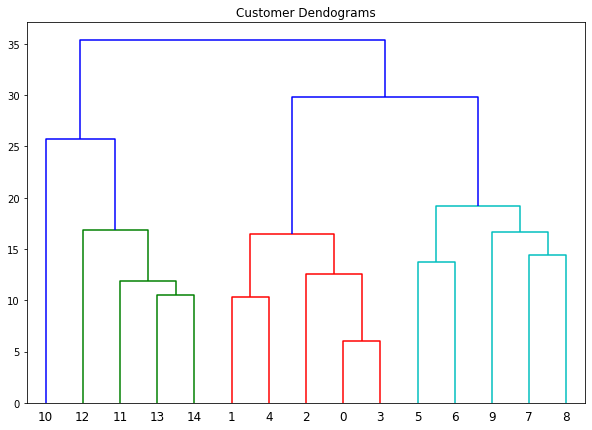

In [16]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### 내용 및 코드 참조
- 서대호, "잡아라! 텍스트 마이닝 with 파이썬", 비제이퍼블릭, 2019